<a href="https://colab.research.google.com/github/laneboi/playground/blob/master/Training_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

W0630 13:03:35.624303 140316800391040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 13:03:35.655764 140316800391040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 13:03:35.664061 140316800391040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
!pip install numpy==1.16.1
import numpy as np

In [0]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [0]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

# vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0630 13:17:14.708647 140316800391040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.5344 - acc: 0.7755 - val_loss: 0.4001 - val_acc: 0.8677
Epoch 2/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.3209 - acc: 0.8985 - val_loss: 0.3275 - val_acc: 0.8720
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.2349 - acc: 0.9239 - val_loss: 0.2859 - val_acc: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1846 - acc: 0.9399 - val_loss: 0.2742 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1532 - acc: 0.9507 - val_loss: 0.2985 - val_acc: 0.8811
Epoch 6/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1243 - acc: 0.9613 - val_loss: 0.2871 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1081 - acc: 0.9662 - val_loss: 0.3035 - 

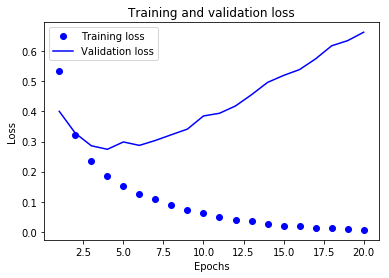

In [0]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

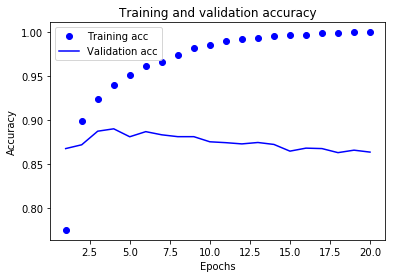

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Excercises

## 1

In [0]:
model_with_one_layer = models.Sequential()

model_with_one_layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_with_one_layer.add(layers.Dense(1, activation='sigmoid'))

model_with_one_layer.compile(optimizer='rmsprop',
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

model_with_one_layer.fit(x_train, y_train, epochs=4, batch_size=512)

results = model_with_one_layer.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.4403 - acc: 0.8316
Epoch 2/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2735 - acc: 0.9083
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2164 - acc: 0.9265
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step
[0.2790045209598541, 0.88836]


In [0]:
model_with_one_layer.predict(x_test)

array([[0.25812835],
       [0.9997951 ],
       [0.8553027 ],
       ...,
       [0.1291376 ],
       [0.10113817],
       [0.5642468 ]], dtype=float32)

In [0]:
model_with_three_layers = models.Sequential()

model_with_three_layers.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_with_three_layers.add(layers.Dense(16, activation='relu'))
model_with_three_layers.add(layers.Dense(16, activation='relu'))
model_with_three_layers.add(layers.Dense(1, activation='sigmoid'))

model_with_three_layers.compile(optimizer='rmsprop',
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

model_with_three_layers.fit(x_train, y_train, epochs=4, batch_size=512)

results = model_with_three_layers.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.4409 - acc: 0.8211
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2513 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.1939 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step
[0.32459619216918945, 0.87732]


In [0]:
model_with_three_layers.predict(x_test)

array([[0.09695905],
       [0.9998543 ],
       [0.4217045 ],
       ...,
       [0.08997715],
       [0.05209044],
       [0.326576  ]], dtype=float32)

## 2

In [0]:
# Model with 32 hidden inputs per layer.
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.4305 - acc: 0.8287
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2425 - acc: 0.9122
Epoch 3/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1886 - acc: 0.9317
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step
[0.30978419454574585, 0.8804]


In [0]:
# Model with 64 hidden inputs per layer.
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.4274 - acc: 0.8104
Epoch 2/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.2386 - acc: 0.9073
Epoch 3/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.1822 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 3s 117us/step
[0.34563850208759306, 0.87004]


## 3

In [0]:
# Model using mse.
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.1459 - acc: 0.8245
Epoch 2/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.0772 - acc: 0.9113
Epoch 3/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.0582 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 2s 97us/step
[0.0873935867702961, 0.88096]


In [0]:
# Model using tanh.
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.4170 - acc: 0.8273
Epoch 2/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2347 - acc: 0.9140
Epoch 3/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.1761 - acc: 0.9360
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step
[0.3452320263004303, 0.87124]


# Reuters

In [0]:
from keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

2113536/2110848 [==============================] - 0s 0us/step
8982
2246


In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 260us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


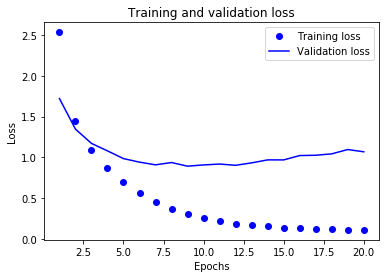

In [0]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

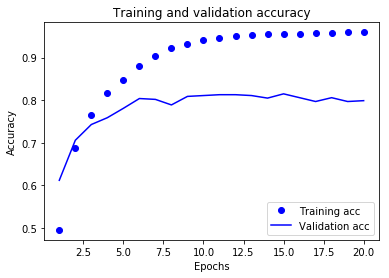

In [0]:
acc = history.history['acc']

val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 265us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 144us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [0]:
print(results)

[1.0224983157160445, 0.7756010686194165]


In [0]:
import copy


test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [0]:
predictions = model.predict(x_test)

In [0]:
np.argmax(predictions[0])

3

# Regression

In [0]:
from keras.datasets import boston_housing


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
from keras import models
from keras import layers


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Validation fold #{i+1}')
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                             train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                             train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Validation fold #1
Validation fold #2
Validation fold #3
Validation fold #4


In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'Validation fold #{i+1}')
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                             train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                             train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    print(history.history.keys())
    mae_history = history.history['val_mean_absolute_error']
    all_scores.append(mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories])
                       for i in range(num_epochs)]

Validation fold #1
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
Validation fold #2
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
Validation fold #3
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
Validation fold #4
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


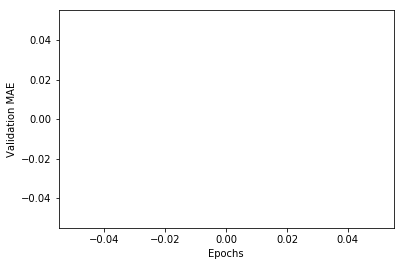

In [0]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()